In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing CSV file

dataset=pd.read_csv('Flight Price Prediction.csv')

In [3]:
dataset

,s no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Additional_Info,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,No info,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,No info,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,No info,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,No info,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,No info,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,NaN,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,NaN,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,NaN,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,NaN,81585


In [4]:
dataset.columns

Index(['s no', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'Additional_Info', 'price'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 13 columns):
s no                300153 non-null int64
airline             300153 non-null object
flight              300153 non-null object
source_city         300153 non-null object
departure_time      300153 non-null object
stops               300153 non-null object
arrival_time        300153 non-null object
destination_city    300153 non-null object
class               300153 non-null object
duration            300153 non-null float64
days_left           300153 non-null int64
Additional_Info     267075 non-null object
price               300153 non-null int64
dtypes: float64(1), int64(3), object(9)
memory usage: 29.8+ MB


In [6]:
dataset["price"].value_counts()

54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
15077       1
8499        1
18818       1
14732       1
15239       1
Name: price, Length: 12157, dtype: int64

# Data Preprocessing

In [7]:
#checking for total null values
dataset.isnull().sum()

s no                    0
airline                 0
flight                  0
source_city             0
departure_time          0
stops                   0
arrival_time            0
destination_city        0
class                   0
duration                0
days_left               0
Additional_Info     33078
price                   0
dtype: int64

In [8]:
# Since Additional_info column is a unwanted column, null values present in this column doesn't affect final output

In [9]:
# If we see any feature unrelated to label, we can just drop them before starting preprocessing

dataset = dataset.drop(["s no", "flight", "Additional_Info"], axis =1)

In [10]:
dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Univariate and Bivariate analysis

In [11]:
quan=[]
qual=[]
for columnName in dataset.columns:
    print(columnName)
    if(dataset[columnName].dtype=='O'):
        print("qual")
        qual.append(columnName)
    else:
        print("quan")
        quan.append(columnName)

airline
qual
source_city
qual
departure_time
qual
stops
qual
arrival_time
qual
destination_city
qual
class
qual
duration
quan
days_left
quan
price
quan


In [12]:
quan

['duration', 'days_left', 'price']

In [13]:
qual

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [14]:
#Perform descriptive analysis

descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1=25%","Q2=50%",
                                "Q3=75%","99%","Q4=100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
for columnName in quan:    
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1=25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2=50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3=75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
    descriptive[columnName]["Q4=100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3=75%"]-descriptive[columnName]["Q1=25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1=25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3=75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()

In [15]:
descriptive

,duration,days_left,price
Mean,12.221,26.0048,20889.7
Median,11.25,26,7425
Mode,2.17,25,54608
Q1=25%,6.83,15,4783
Q2=50%,11.25,26,7425
Q3=75%,16.17,38,42521
99%,29.08,49,76736
Q4=100%,49.83,49,123071
IQR,9.34,23,37738
1.5rule,14.01,34.5,56607


In [16]:
cate=dataset[qual]

In [17]:
cate

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business


In [18]:
dataset.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [19]:
#pip install -U seaborn

# Graphical Data Visualisation

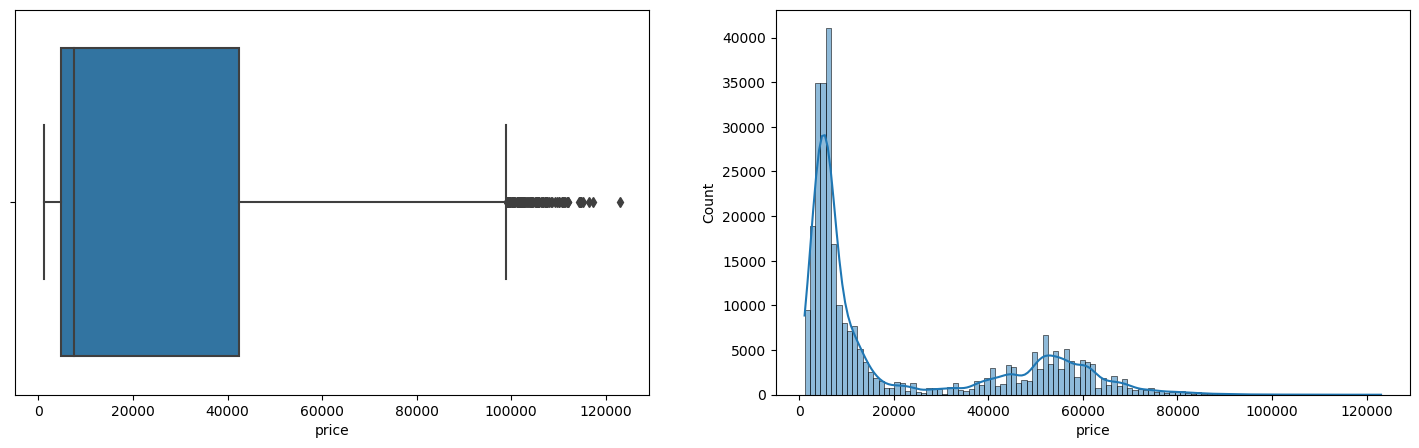

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = dataset, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = dataset)

In [21]:
# Even though the mean is around 20000, we can see here that the median is approximately 7500. 
# This difference is explainable by the presence of two different tickets: business and economy. 
# On the second graph, we can see that the dispersion seems to be composed by two gaussian curves

Text(0.5, 1.0, 'Airline prices based on the class and company')

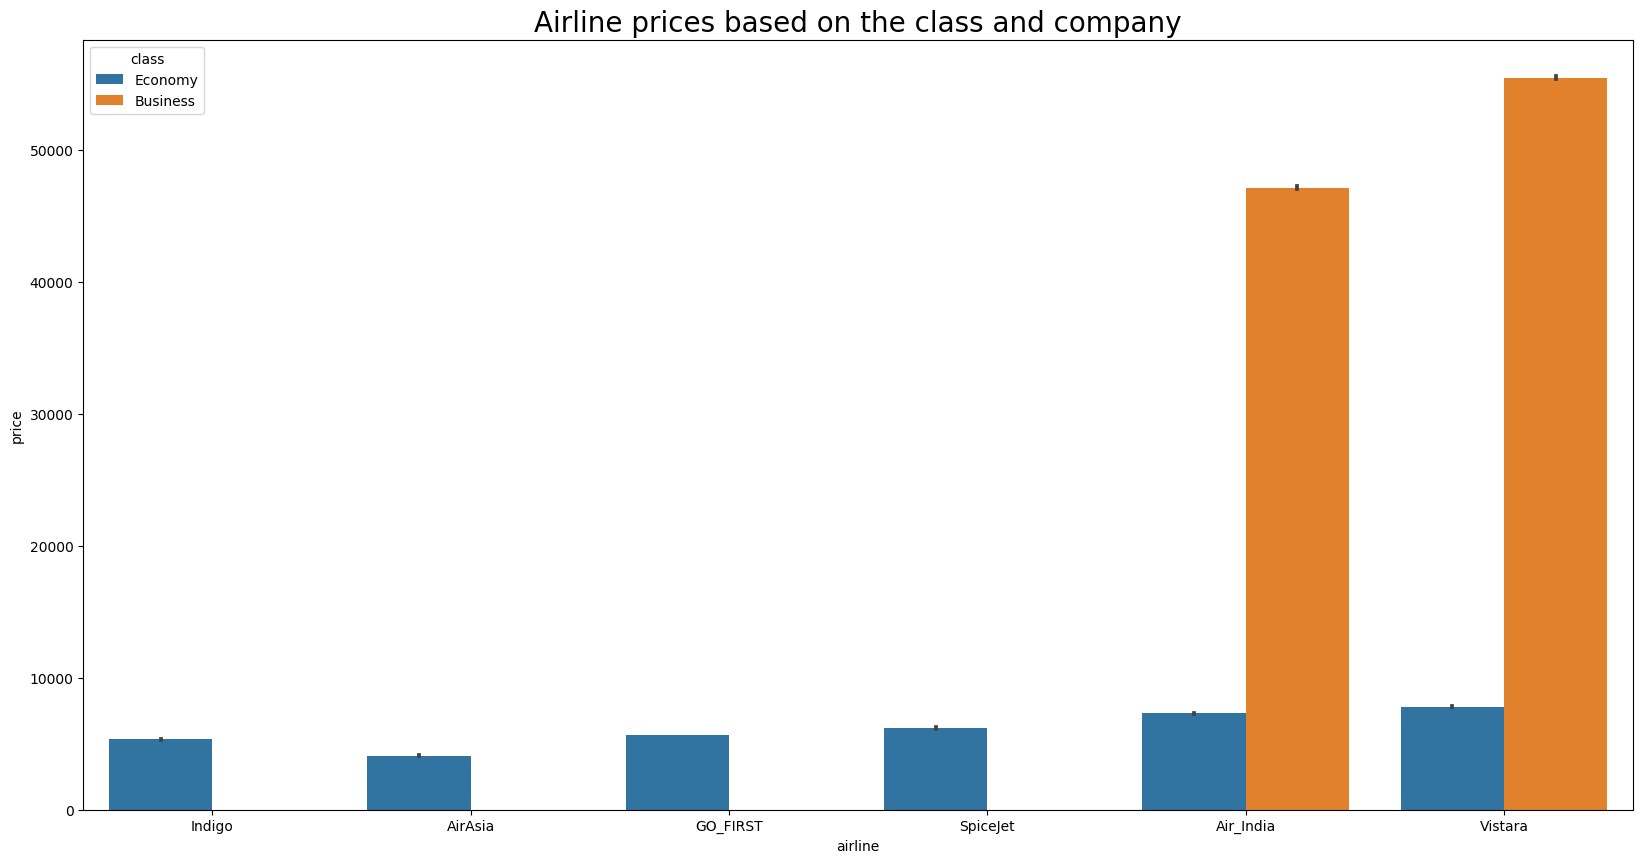

In [22]:
# How does the ticket price vary between Economy and Business class?

plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=dataset.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

In [23]:
# Business flights are only available in two companies: Air India and Vistara. 
# Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

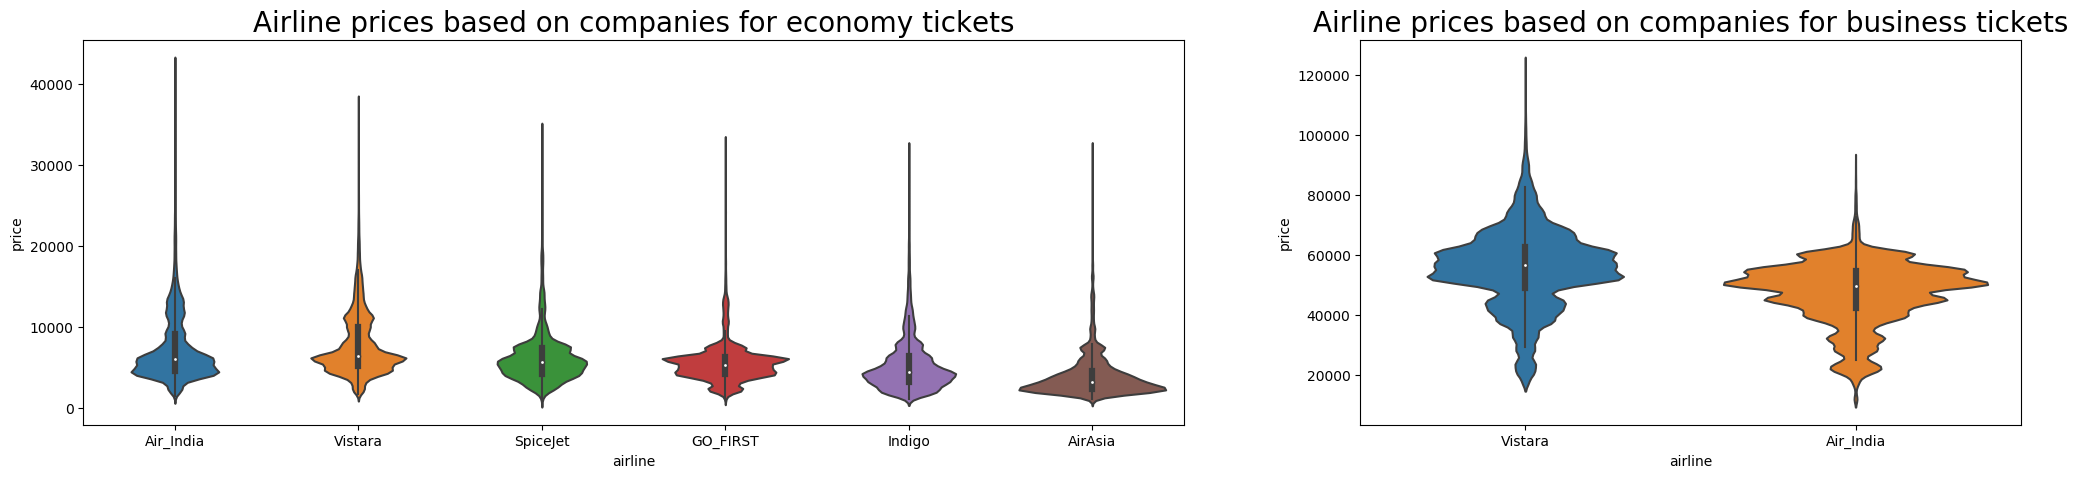

In [24]:
# Does price vary with Airlines?

fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "price", x = "airline",data = dataset.loc[dataset["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "price", x = "airline",data = dataset.loc[dataset["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

In [25]:
# There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. 
# However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.

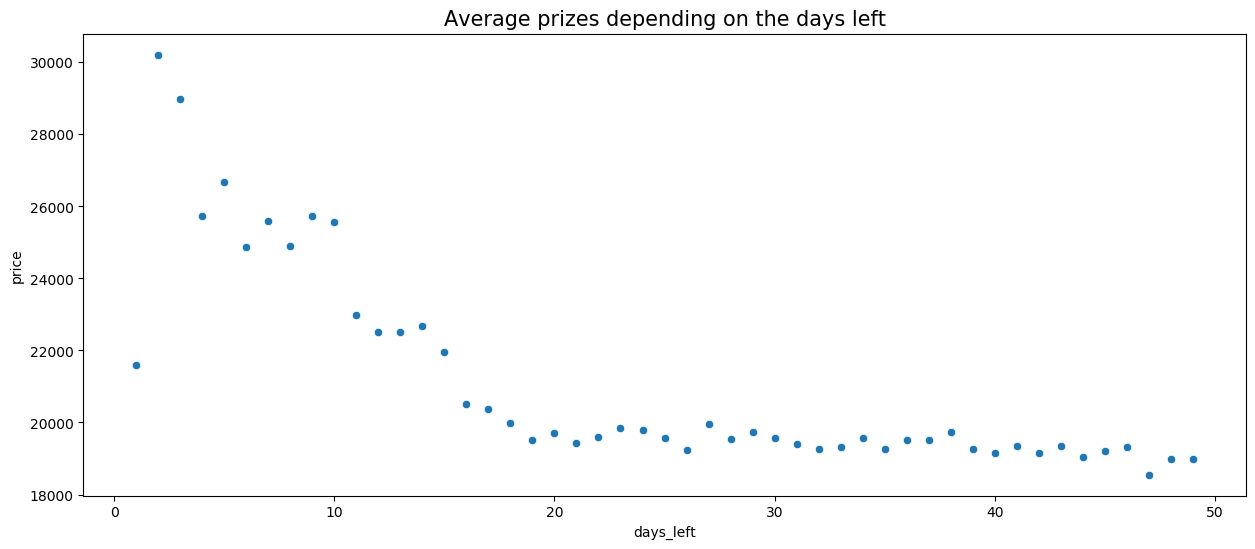

In [26]:
# How is the price affected when tickets are bought in just 1 or 2 days before departure?

dataset_temp = dataset.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=dataset_temp).set_title("Average prizes depending on the days left",fontsize=15)

In [27]:
# It is possible to see two different curves on this graph, the first one, stable between 50 and 20 days before the flight, 
# and a positive monotone curve between 20 and 2 days before
#  The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats 
# and thus lower the prices of the tickets to ensure the planes remains full.

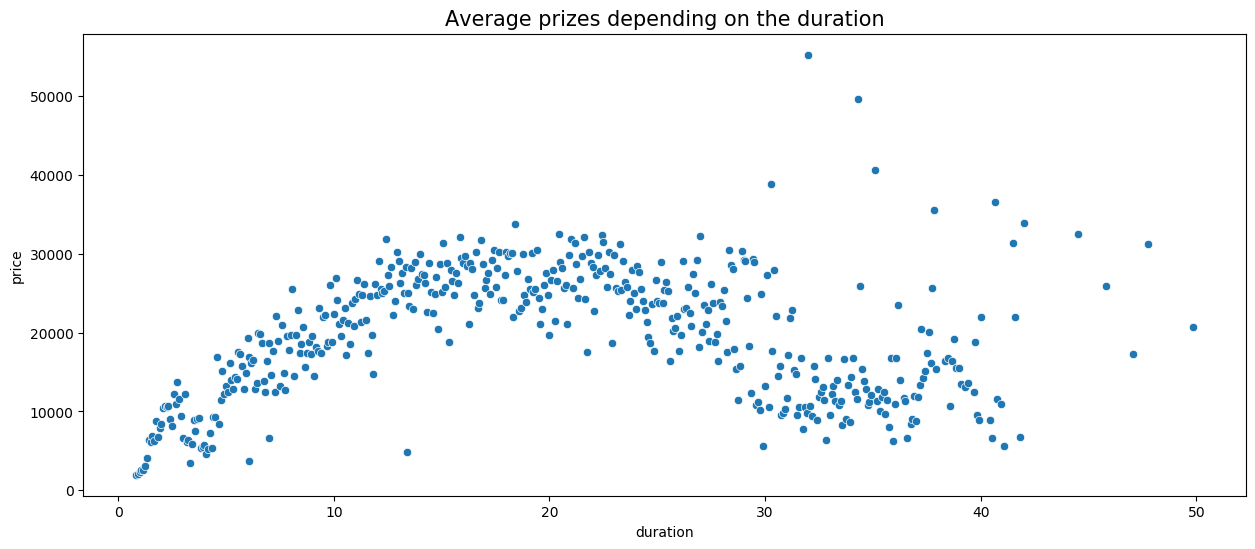

In [28]:
# Does the price change with the duration of the flight?

dataset_temp = dataset.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=dataset_temp).set_title("Average prizes depending on the duration",fontsize=15)

In [29]:
#  The prices reaches a high price at a duration of 20 hours before lowering again.

Text(0.5, 1.0, 'Airline prices based on the arrival time')

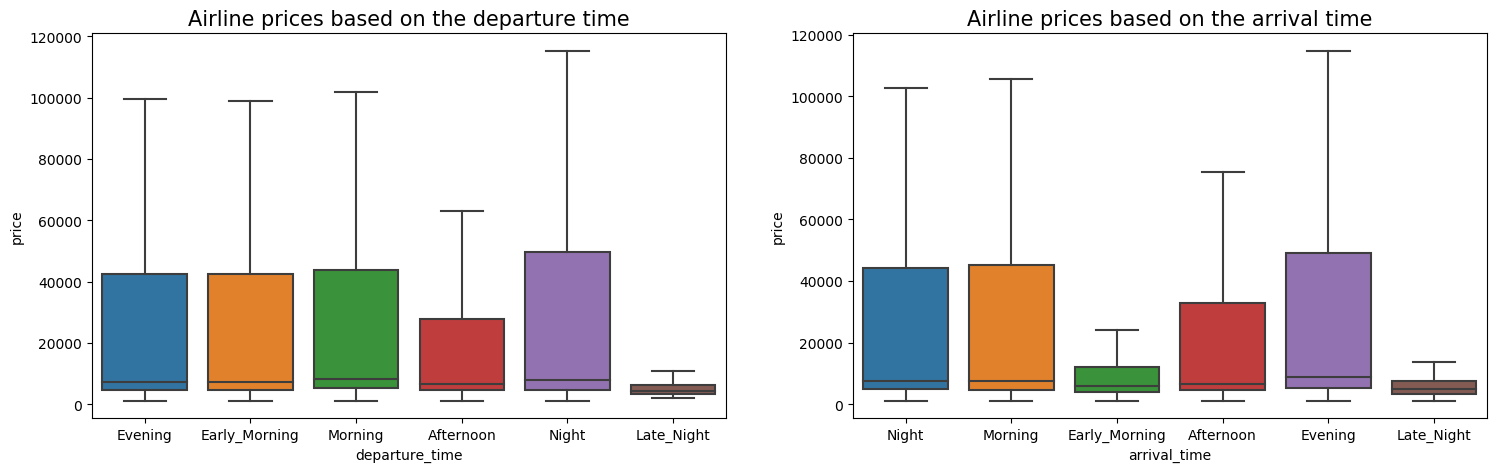

In [30]:
# Does ticket price change based on the departure time and arrival time?

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=dataset, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

In [31]:
# As expected, leaving at night or arriving at night remains the cheapest way to travel. 
# But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

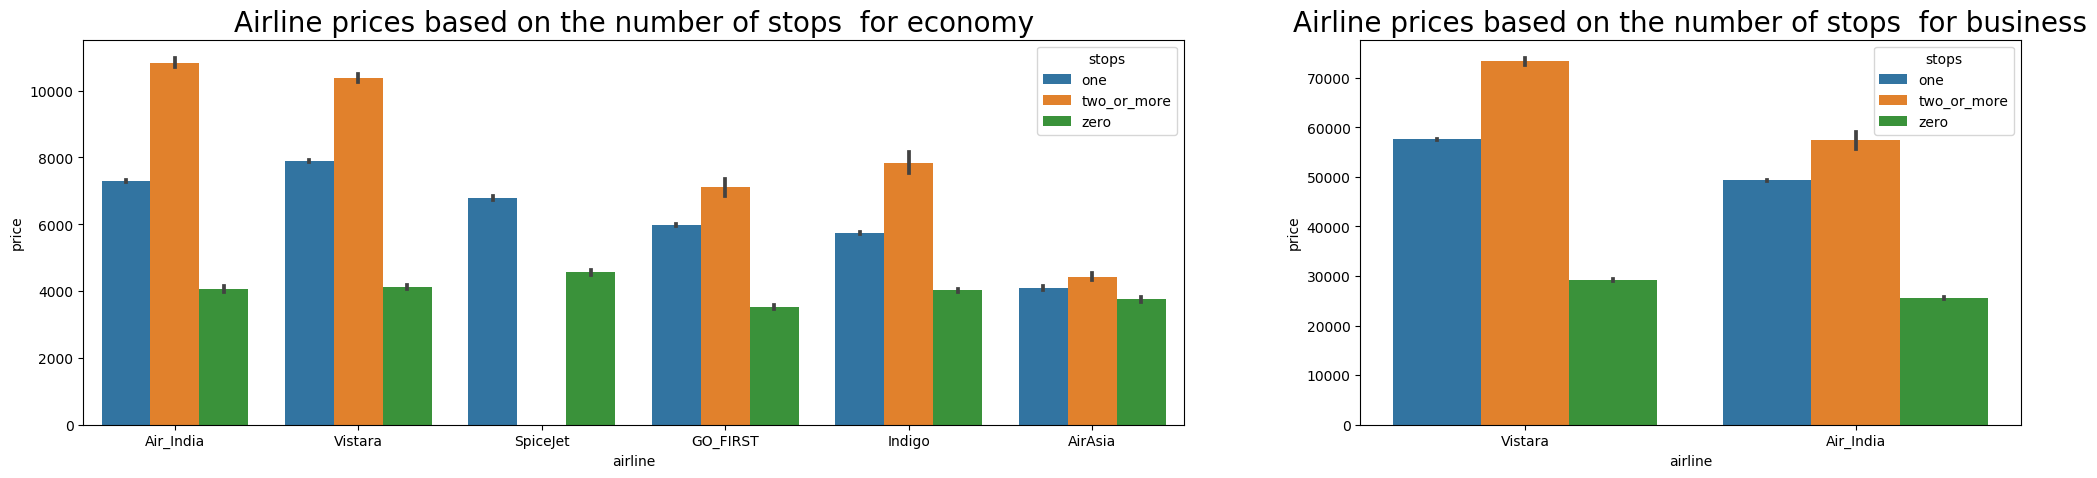

In [32]:
# Does the number of stops influences the price?

fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = dataset.loc[dataset["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = dataset.loc[dataset["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

In [33]:
#  It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. 
# The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.

# Converting all Categorical data in to numerical data

In [34]:
dataset["stops"] = dataset["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
dataset["class"] = dataset["class"].replace({'Economy':0,'Business':1}).astype(int)

In [35]:
dataset["source_city"] = dataset["source_city"].replace({'Delhi':0,'Bangalore':1,'Chennai':2,'Hyderabad':3,'Kolkata':4,'Mumbai':5}).astype(int)
dataset["destination_city"] = dataset["destination_city"].replace({'Delhi':0,'Bangalore':1,'Chennai':2,'Hyderabad':3,'Kolkata':4,'Mumbai':5}).astype(int)
dataset["departure_time"] = dataset["departure_time"].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5}).astype(int)
dataset["arrival_time"] = dataset["arrival_time"].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5}).astype(int)

In [36]:
dataset["airline"] = dataset["airline"].replace({'Air_India':0,'AirAsia':1,'GO_FIRST':2,'Indigo':3,'SpiceJet':4,'Vistara':5}).astype(int)
dataset["airline"].head()

0    4
1    4
2    1
3    5
4    5
Name: airline, dtype: int32

In [37]:
dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,0,3,0,4,5,0,2.17,1,5953
1,4,0,0,0,1,5,0,2.33,1,5953
2,1,0,0,0,0,5,0,2.17,1,5956
3,5,0,1,0,2,5,0,2.25,1,5955
4,5,0,1,0,1,5,0,2.33,1,5955


In [38]:
dataset.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

# Seperating independant and dependant columns

In [39]:
indep=dataset[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left']]
dep=dataset[['price']]

# Splitting Test and Train Set

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(indep, dep, test_size=1/3, random_state=0)

# Feature Selection & Model Creation

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [42]:
def split_scaler(indep,dep,n):
    x_train, x_test, y_train, y_test = train_test_split(indep,dep,test_size=0.25,random_state=0)
    sc = StandardScaler()
    x_train = sc.transform(x_train)
    x_test = sc.transform(x_test)
    return x_train, x_test, y_train, y_test

# SelectKBest

In [43]:
def selectkbest(indep,dep,n):
        test = SelectKBest(score_func=chi2, k=n)
        fit1= test.fit(indep,dep)
        # summarize scores       
        selectk_features = fit1.transform(indep)
        return selectk_features

In [44]:
def r2_prediction(regressor,X_test,y_test):
     y_pred = regressor.predict(X_test)
     from sklearn.metrics import r2_score
     r2=r2_score(y_test,y_pred)
     return r2

In [45]:
def Linear(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return r2

In [46]:
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'linear')
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return r2

In [47]:
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'rbf')
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return r2

In [48]:
def Decision(X_train,y_train,X_test):
        
        from sklearn.tree import DecisionTreeRegressor
        regressor = DecisionTreeRegressor(random_state = 0)
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return r2

In [49]:
def random(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestRegressor
        regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return r2

In [50]:
def selectk_regression(acclin,accsvml,accsvmnl,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Linear','SVMl','SVMnl','Decision','Random'])
    for number,idex in enumerate(dataframe.index):
        
        dataframe['Linear'][idex]=acclin[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [51]:
df2=dataset

df2 = pd.get_dummies(df2, drop_first=True)

indep=df2.drop('price', 1)
dep=df2['price']

In [52]:
kbest=selectkbest(indep,dep,5)

MemoryError: Unable to allocate array with shape (300153, 12157) and data type int64

In [ ]:
acclin=[]
accsvml=[]
accsvmnl=[]
accdes=[]
accrf=[]

In [ ]:
X_train, X_test, y_train, y_test=split_scaler(kbest,dep)  
for i in kbest:   
    r2_lin=Linear(X_train,y_train,X_test)
    acclin.append(r2_lin)
    
    r2_sl=svm_linear(X_train,y_train,X_test)    
    accsvml.append(r2_sl)
    
    r2_NL=svm_NL(X_train,y_train,X_test)
    accsvmnl.append(r2_NL)
    
    r2_d=Decision(X_train,y_train,X_test)
    accdes.append(r2_d)
    
    r2_r=random(X_train,y_train,X_test)
    accrf.append(r2_r)

In [ ]:
result=selectk_regression(acclin,accsvml,accsvmnl,accdes,accrf)
result

# Recursive Feature Elimination

In [53]:
def rfeFeature(indep,dep,n):
        rfelist=[]
        
        from sklearn.linear_model import LinearRegression
        lin = LinearRegression()
        
        from sklearn.svm import SVR
        SVRl = SVR(kernel = 'linear')
        
        from sklearn.svm import SVR
        #SVRnl = SVR(kernel = 'rbf')
        
        from sklearn.tree import DecisionTreeRegressor
        dec = DecisionTreeRegressor(random_state = 0)
        
        from sklearn.ensemble import RandomForestRegressor
        rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
        
        rfemodellist=[lin,SVRl,dec,rf] 
        for i in rfemodellist:
            print(i)
            log_rfe = RFE(i, n)
            log_fit = log_rfe.fit(indep, dep)
            log_rfe_feature=log_fit.transform(indep)
            rfelist.append(log_rfe_feature)
        return rfelist

In [54]:
def rfe_regression(acclog,accsvml,accdes,accrf): 
    
    rfedataframe=pd.DataFrame(index=['Linear','SVC','Random','DecisionTree'],columns=['Linear','SVMl',
                                                                                        'Decision','Random'])

    for number,idex in enumerate(rfedataframe.index):
        
        rfedataframe['Linear'][idex]=acclog[number]       
        rfedataframe['SVMl'][idex]=accsvml[number]
        rfedataframe['Decision'][idex]=accdes[number]
        rfedataframe['Random'][idex]=accrf[number]
    return rfedataframe

In [55]:
df2=dataset
df2 = pd.get_dummies(df2, drop_first=True)

indep=df2.drop('price', 1)
dep=df2['price']

In [56]:
from sklearn.feature_selection import RFE
rfelist=rfeFeature(indep,dep,5)

LinearRegression()


TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
acclin=[]
accsvml=[]
accsvmnl=[]
accdes=[]
accrf=[]

In [ ]:
for i in rfelist:   
    X_train, X_test, y_train, y_test=split_scalar(i,dep)  
    r2_lin=Linear(X_train,y_train,X_test)
    acclin.append(r2_lin)
    
    r2_sl=svm_linear(X_train,y_train,X_test)    
    accsvml.append(r2_sl)
    
    r2_NL=svm_NL(X_train,y_train,X_test)
    accsvmnl.append(r2_NL)
    
    r2_d=Decision(X_train,y_train,X_test)
    accdes.append(r2_d)
    
    r2_r=random(X_train,y_train,X_test)
    accrf.append(r2_r)

In [ ]:
result=rfe_regression(acclin,accsvml,accdes,accrf)
result

In [ ]:
# Ignore below codings

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.preprocessing import OneHotEncoder
#from catboost import CatBoostRegressor

#models = {}

#model = RandomForestRegressor()
#models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
#models["LinearRegression"]={"model":LinearRegression()}
#models["XGBRegressor"]={"model":XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
#models["CatBoostRegressor"]={"model":CatBoostRegressor(logging_level ='Silent',iterations=500,random_state=1)}